<a href="https://colab.research.google.com/github/sivaparvathi620/Codsoft-AI/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading model... Please wait.


Device set to use cpu


Model loaded successfully!
Enter image path or URL (leave blank for default parrots image): https://tse2.mm.bing.net/th/id/OIP.gdNVfcnAjQURwqcuGIDHAQHaE8?pid=Api&P=0&h=180


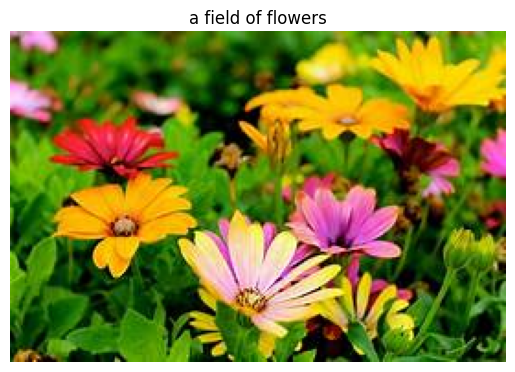

Generated caption: a field of flowers
Caption saved to: captions/online_image_caption.txt


In [7]:
from transformers import pipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt
import os

# Load the image captioning pipeline
print("Loading model... Please wait.")
captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")
print("Model loaded successfully!")

# Function to load image from local or URL
def load_image(source):
    if os.path.exists(source):  # Local file
        return Image.open(source)
    elif source.startswith("http"):  # URL
        return Image.open(requests.get(source, stream=True).raw)
    else:
        raise ValueError("Invalid image source. Provide a valid file path or URL.")

# Ask user for input
source = input("Enter image path or URL (leave blank for default parrots image): ").strip()
if not source:
    source = "https://huggingface.co/datasets/Narsil/image_dummy/raw/main/parrots.png"

# Load image
try:
    image = load_image(source)
except Exception as e:
    print(f"Error loading image: {e}")
    exit()

# Generate caption
result = captioner(image, max_new_tokens=40)
caption = result[0]['generated_text']

# Show image with caption
plt.imshow(image)
plt.axis("off")
plt.title(caption, fontsize=12, wrap=True)
plt.show()

# Save caption to file
os.makedirs("captions", exist_ok=True)
filename = os.path.basename(source).split('.')[0] if os.path.exists(source) else "online_image"
caption_file = f"captions/{filename}_caption.txt"

with open(caption_file, "w", encoding="utf-8") as f:
    f.write(caption)

print("Generated caption:", caption)
print(f"Caption saved to: {caption_file}")
